##### A Superstore has provided some details about their customers and where they purchase from, and have given us the total profits and loss they have made over a certain period of time, help them understand how to improve their records.

In [74]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
raw_data=pd.read_csv('SampleSuperstore.csv')

In [76]:
raw_data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [77]:
raw_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [78]:
raw_data.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [79]:
raw_data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [80]:
columns=list(raw_data.columns)

In [81]:
columns.remove('Ship Mode')
columns.remove('Segment')
columns.remove('Country')
columns.remove('City')
columns.remove('State')
columns.remove('Region')
columns.remove('Category')
columns.remove('Sub-Category')

##### For continuous values
* example: sns.distplot(raw_data['Sales'],kde=True,bins=10,color='red',ax=ax,rug=True)

##### Keep in mind, Quantity and Discount are not continuous variables but since they are numerical variables, i have tried to see their histogram.

C:\Users\ajay3\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ajay3\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


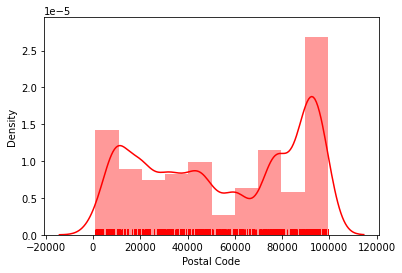

C:\Users\ajay3\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ajay3\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


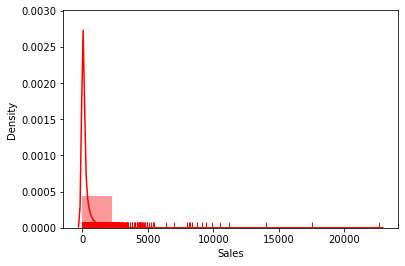

C:\Users\ajay3\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ajay3\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


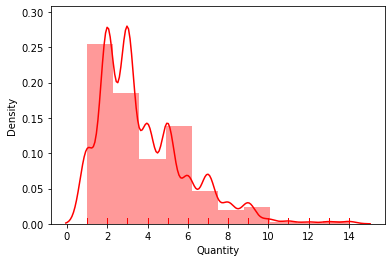

C:\Users\ajay3\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ajay3\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


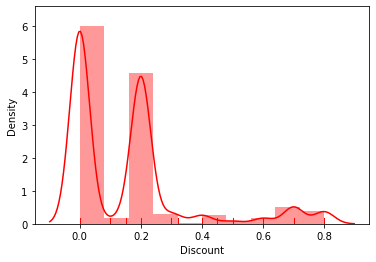

C:\Users\ajay3\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ajay3\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


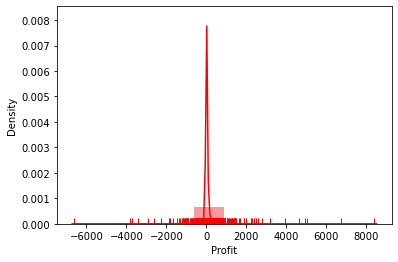

In [82]:
# continuous values
for i in columns:
    fig,ax=plt.subplots()
    sns.distplot(raw_data[i],kde=True,bins=10,color='red',ax=ax,rug=True)
    ax.set(xlabel=i)
    plt.show()

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 2.000e+00,
        2.000e+00, 7.000e+00, 9.000e+00, 1.100e+01, 3.300e+01, 1.130e+02,
        7.884e+03, 1.617e+03, 1.810e+02, 5.100e+01, 2.800e+01, 9.000e+00,
        8.000e+00, 9.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 4.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-6599.978     , -6385.69294286, -6171.40788571, -5957.12282857,
        -5742.83777143, -5528.55271429, -5314.26765714, -509

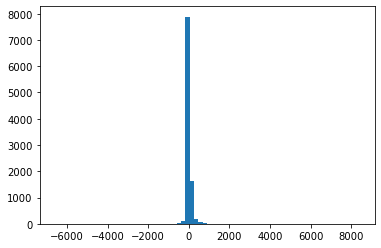

In [83]:
plt.hist(raw_data['Profit'],bins=70)

* Postal Code is spread out meaning the purchases have been made throughout the country from various states
* Sales are predominantly in the range of 0 to 5000, where highest is 22638.48 and lowest is 0.44
* Quantity varies between 1-14 where maximum is between 1 and 5.
* Discount is in a varied range from 0 to 0.8, generally discounts are not offered and if they are its mode value is 0.2
* Profit made and losses made are not very high and hang around the 0 mark for most of the part.

* Below is the way we found the max and minimum

In [84]:
max(raw_data['Sales'])

22638.48

In [85]:
a=raw_data[raw_data['Sales']==min(raw_data['Sales'])]

In [86]:
a

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
4101,Standard Class,Consumer,United States,Houston,Texas,77095,Central,Office Supplies,Appliances,0.444,1,0.8,-1.11


* Now for the Nominal/Ordinal values

In [87]:
column_nom=list(raw_data.columns)

In [88]:
raw_data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [89]:
column_nom.remove('Postal Code')
column_nom.remove('Sales')
column_nom.remove('Profit')

##### categorical values 
* example: sns.countplot(y='Pclass',data=df,hue='Sex')

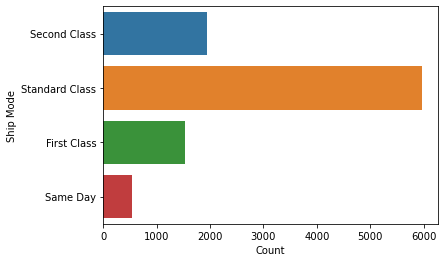

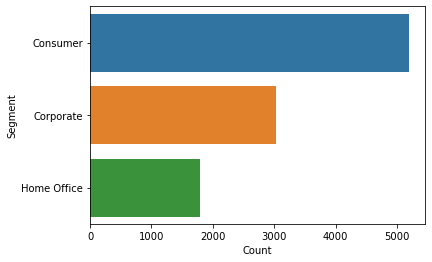

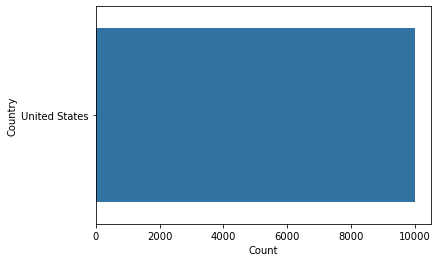

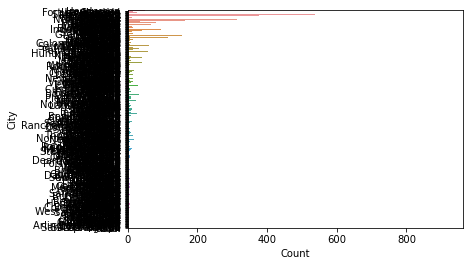

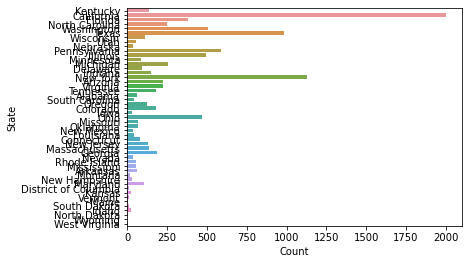

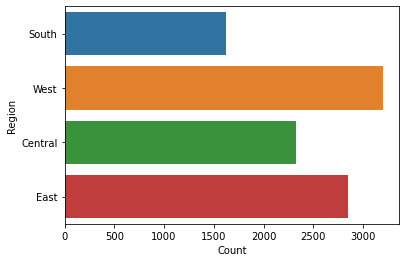

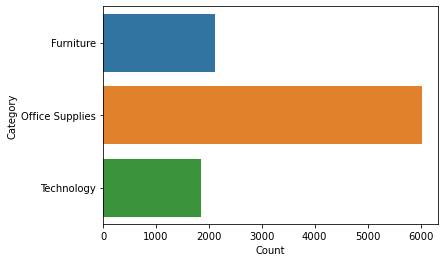

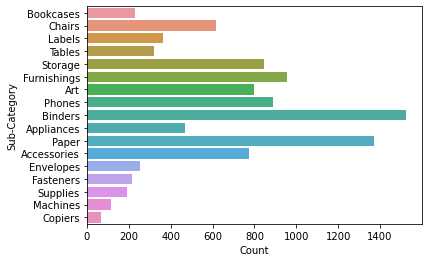

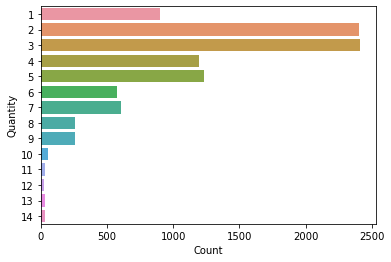

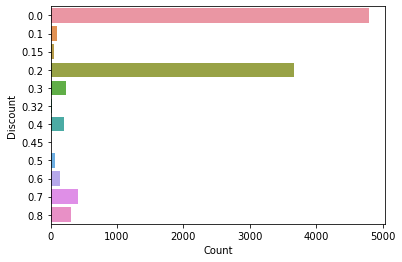

In [90]:
for i in column_nom:
    fig,ax=plt.subplots()
    sns.countplot(y=i,data=raw_data)
    ax.set(ylabel=i)
    ax.set(xlabel='Count')


Ship Mode


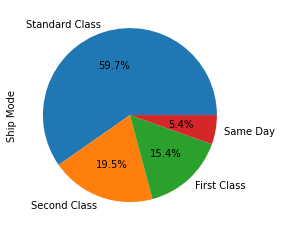



Segment


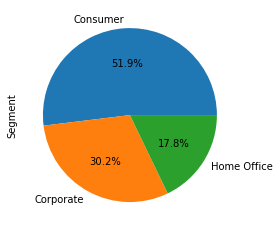



Country


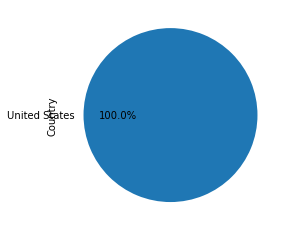



City


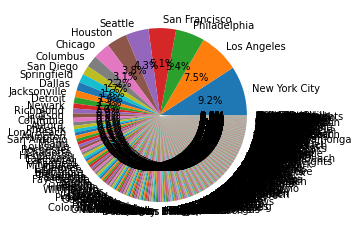



State


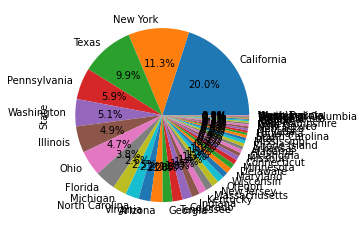



Region


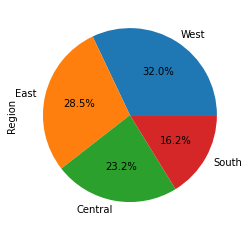



Category


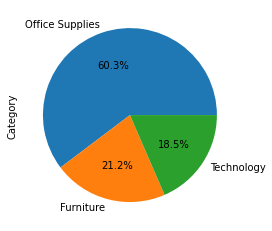



Sub-Category


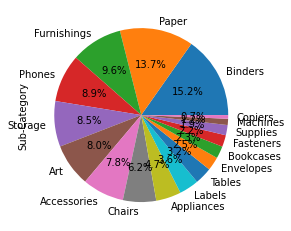



Quantity


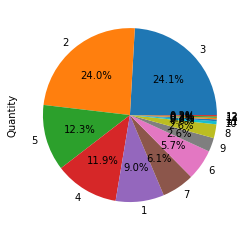



Discount


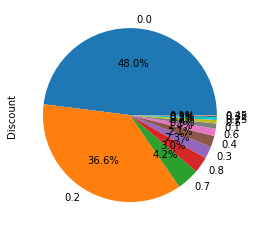

In [91]:
for i in column_nom:
    print('')
    print(i)
    b=raw_data[i].value_counts()/len(raw_data)*100
    b.plot.pie(autopct="%.1f%%")
    plt.show()
    print('')

* Ship Mode is the Standard Class, proceeded by second class and then the First Class and then on the Same day, Maybe trying to ship the products on the same day is something the company should end up thinking about. The Percentage Charts helps to visualize
* The Segment contains Consumers as lead buyers followed by Corporate and Then the Home Office. Keeping Products which consumers and Corporate buy will increase Sales
* city and state, we'll make another one since it's crowded.
* The West Region has the highest percentage with The East and Central following closeby. Maybe we could see sales with respect to each other
* Office Supplies are 60% of their sales. They should focus on this region
* Sub-category: Paper,Furnishings,Binders,Phones,Storage make up for 55% of the things bought in the sub category 
* People generally buy a pair of items or 3 items for about 48.1%, so buying too much in bulk could be an issue
* Half of the supplies don't have discount whereas if they do 36% have an 0.2 discount rate.

In [92]:
v=raw_data.groupby('Region')['City']

In [93]:
vp=(v.value_counts()/len(raw_data))*100

In [94]:
vp

Region   City       
Central  Houston        3.772263
         Chicago        3.141885
         Dallas         1.570943
         Detroit        1.150690
         San Antonio    0.590354
                          ...   
West     San Mateo      0.010006
         Santa Maria    0.010006
         Vacaville      0.010006
         Whittier       0.010006
         Yucaipa        0.010006
Name: City, Length: 583, dtype: float64

<AxesSubplot:ylabel='City'>

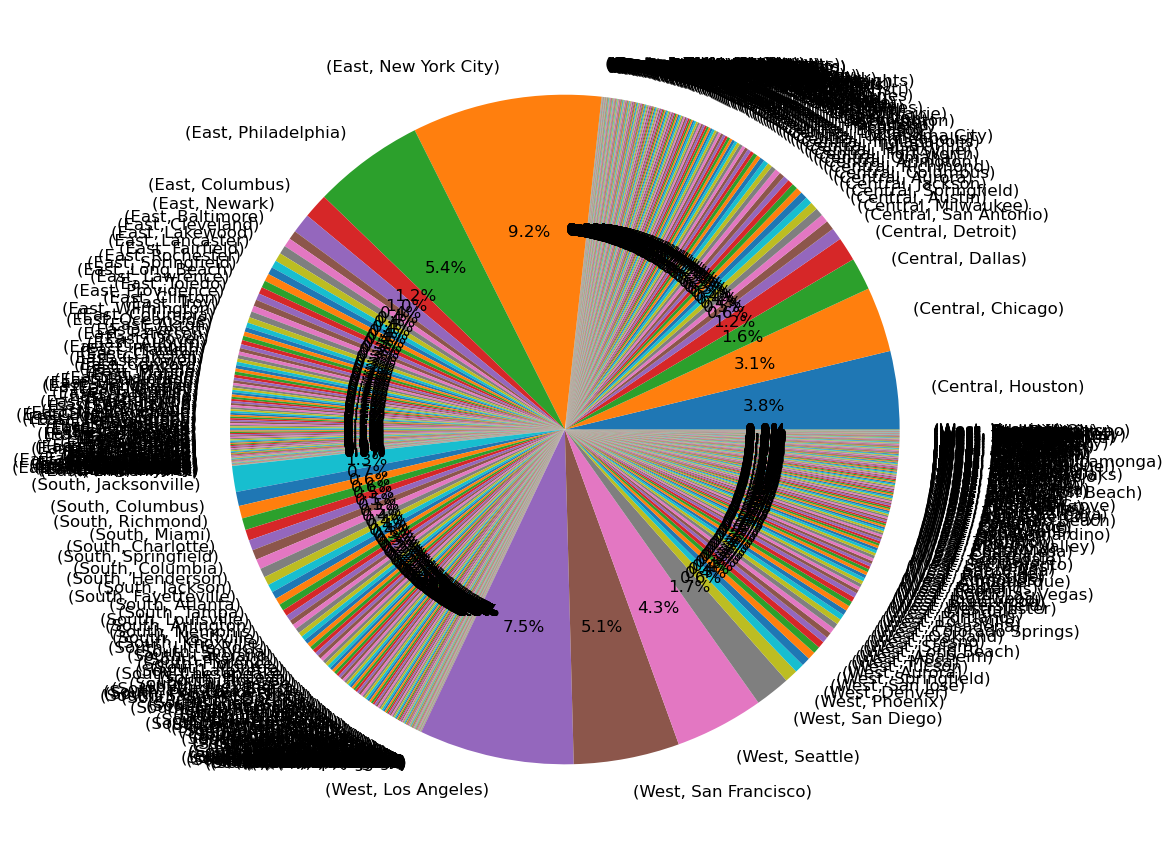

In [95]:
plt.figure(figsize=(9,15),
        dpi=120)
vp.plot.pie(autopct="%.1f%%")

* Cities Like Los Angeles,San Francisco,Seattle,San Diego in the West,
* Jacksonville in the South, 
* Houston,Chicago,Dallas in the Central,
* New York,Philadelphia,Colombus,Newark, Baltimore in the East
* All these add up to a percentage greater than 30%

# Multivariate analysis
  * Example: sns.relplot(y,x,data,kind)

In [101]:
column_nom_n=column_nom.copy()
column_nom_n.remove('Country')
column_nom_n.remove('State')
column_nom_n.remove('City')

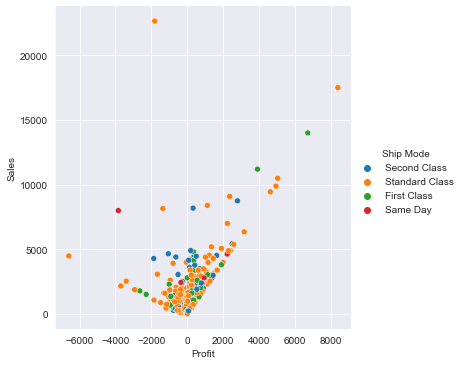

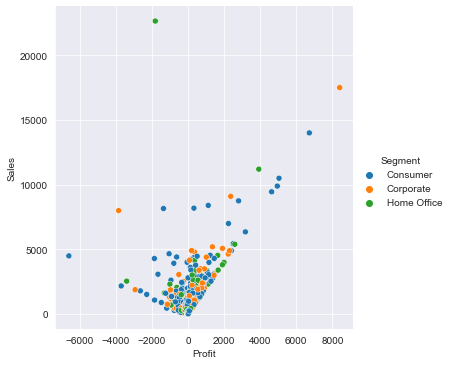

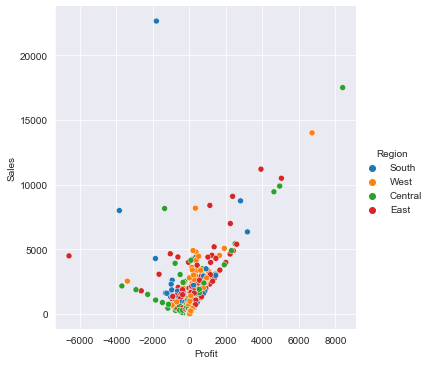

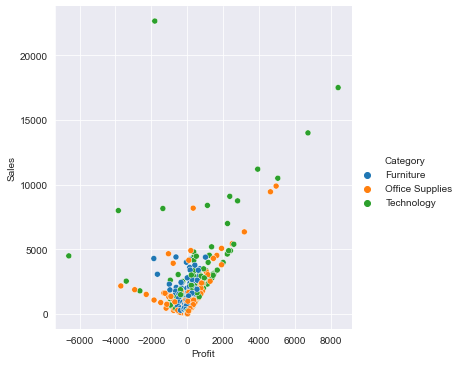

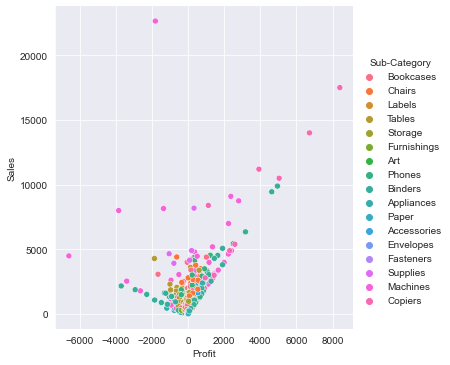

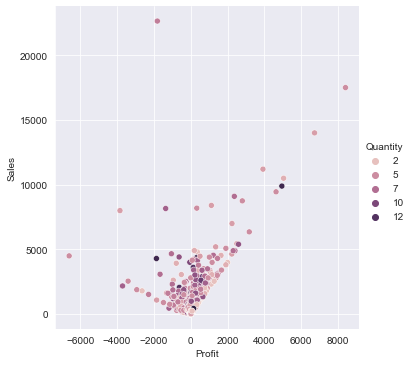

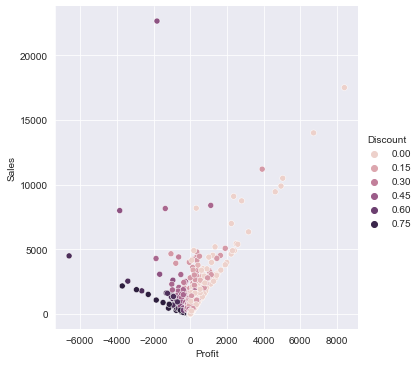

In [104]:
#multivariate analysis
# This is a scatter plot
sns.set_style('darkgrid')
for i in column_nom_n:
    sns.relplot(y='Sales',x='Profit',data=raw_data,kind='scatter',hue=i)
    

* Standard Class is mixed, whereas the profit to loss ratio for second class is high, very rarely is there any loss with respect to first class.
* Consumer is mixed, The corporate section is proving to give profits, and home office rarely results in a loss
* We can see a Downward Trend for Central,Whereas it's somewhat 0 profit near for the West Region, Southern has a somewhat little loss
* In category, we have technology giving good profits, while office supplies generally are mixed around, furniture doesn't give great profits per say
* Paper, Binders, Chairs ,Copiers, Machines provide a good profit.
* Quantity wise 5--8 looks like it has a downward trend, whereas 10-12 won't provide too much profit.
* Huge Discount are reducing profits drastically and should be considered as to not include it or keep going with the current structure.

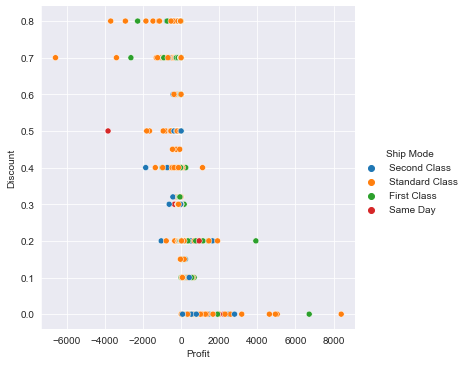

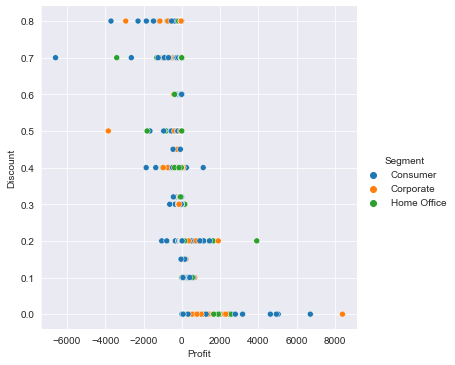

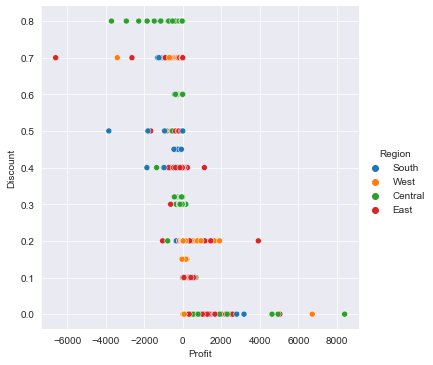

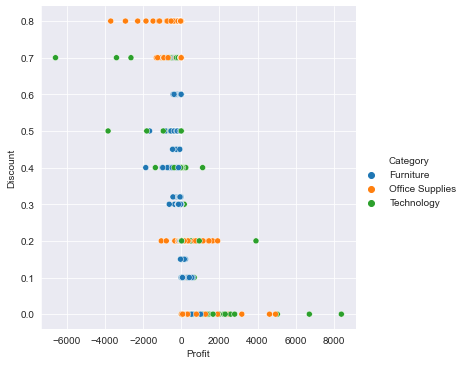

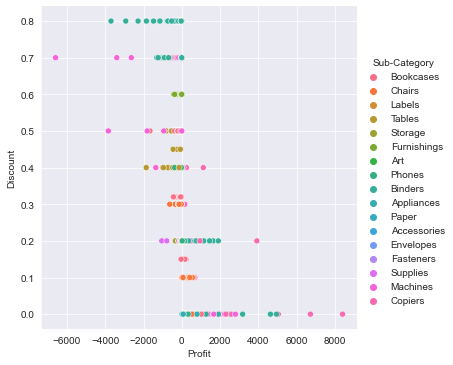

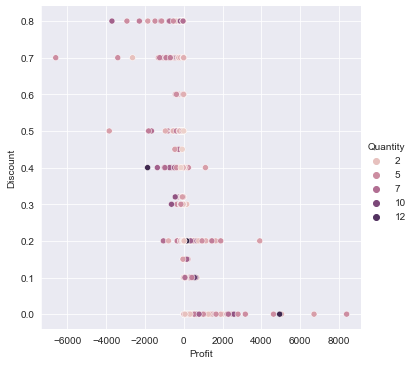

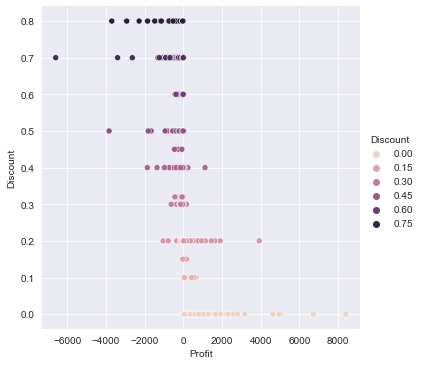

In [105]:
#multivariate analysis
# This is a scatter plot
sns.set_style('darkgrid')
for i in column_nom_n:
    sns.relplot(y='Discount',x='Profit',data=raw_data,kind='scatter',hue=i)
    

* Discount after 0.2 are not advisable
* Generally the profit is reducing due to discount in the Central region, With 0.2, they are making profit in West and somewhat no profit in the East with 0.4
* Office Supplies sold in discount are hurting the profit, not much in regards with Furniture.
* Binders are getting sold with loss, will hurt the company as well
##### Ignore the last two graphs

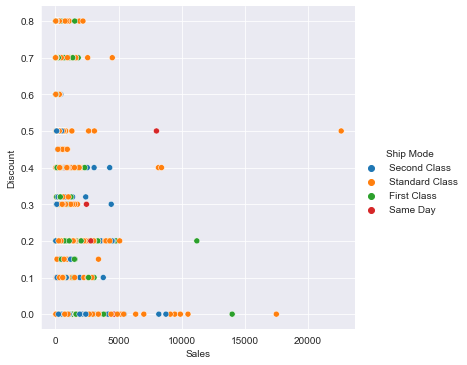

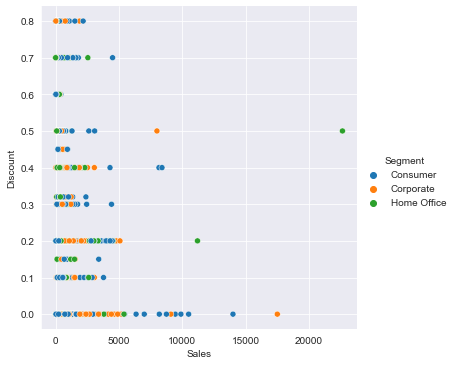

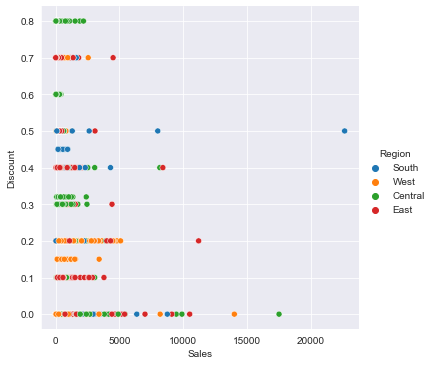

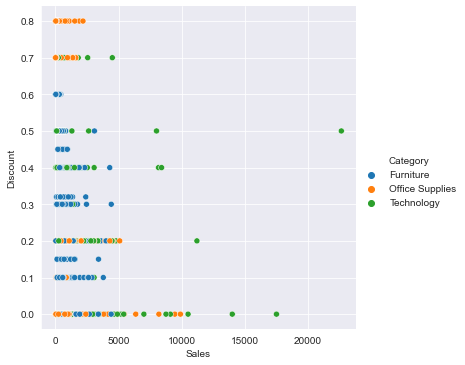

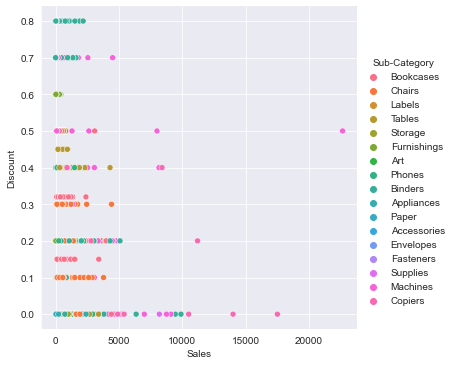

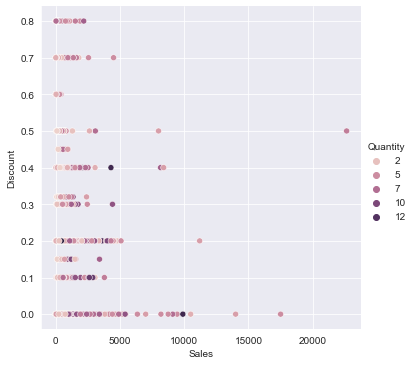

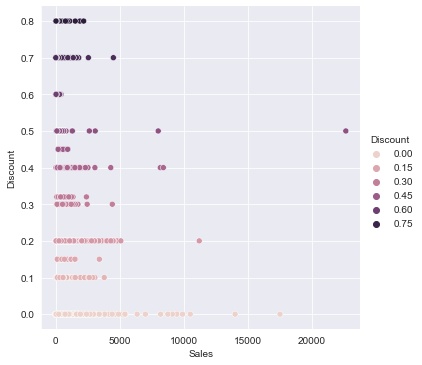

In [106]:
#multivariate analysis
# This is a scatter plot
sns.set_style('darkgrid')
for i in column_nom_n:
    sns.relplot(y='Discount',x='Sales',data=raw_data,kind='scatter',hue=i)
    

* The number of Sales decreased with the discount increased,
* Consumer items were sold with high discount,
* Central was buying at high discount
* These give similar inferences compared to the Profit-Discount graph

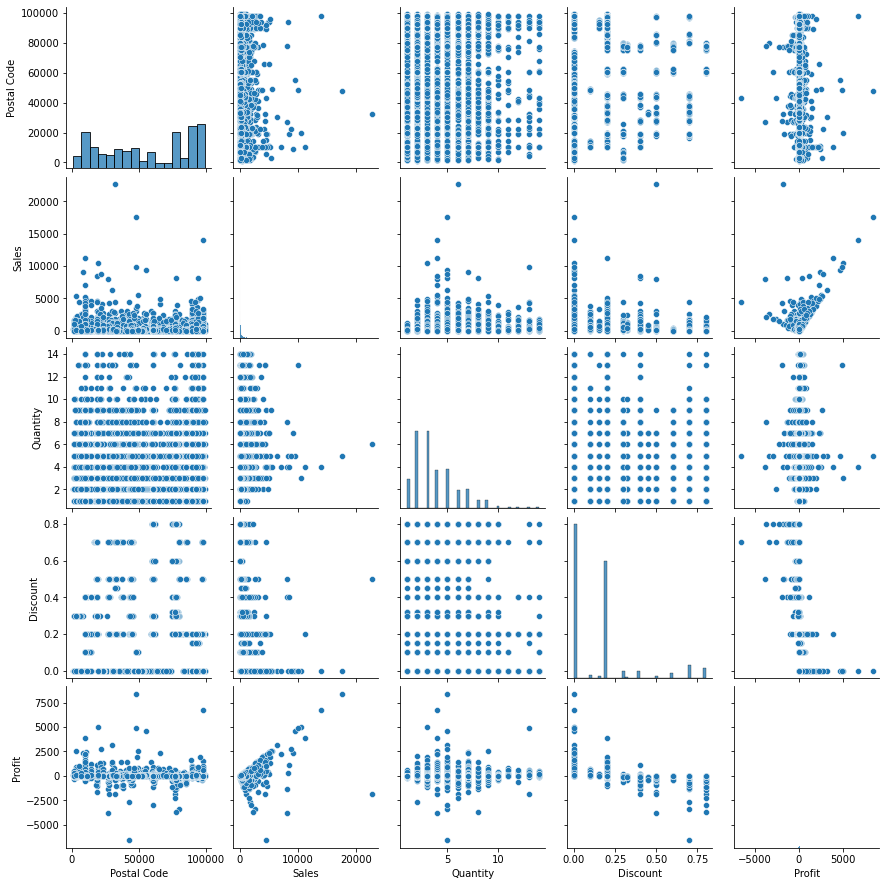

In [7]:
sns.pairplot(raw_data)

<AxesSubplot:>

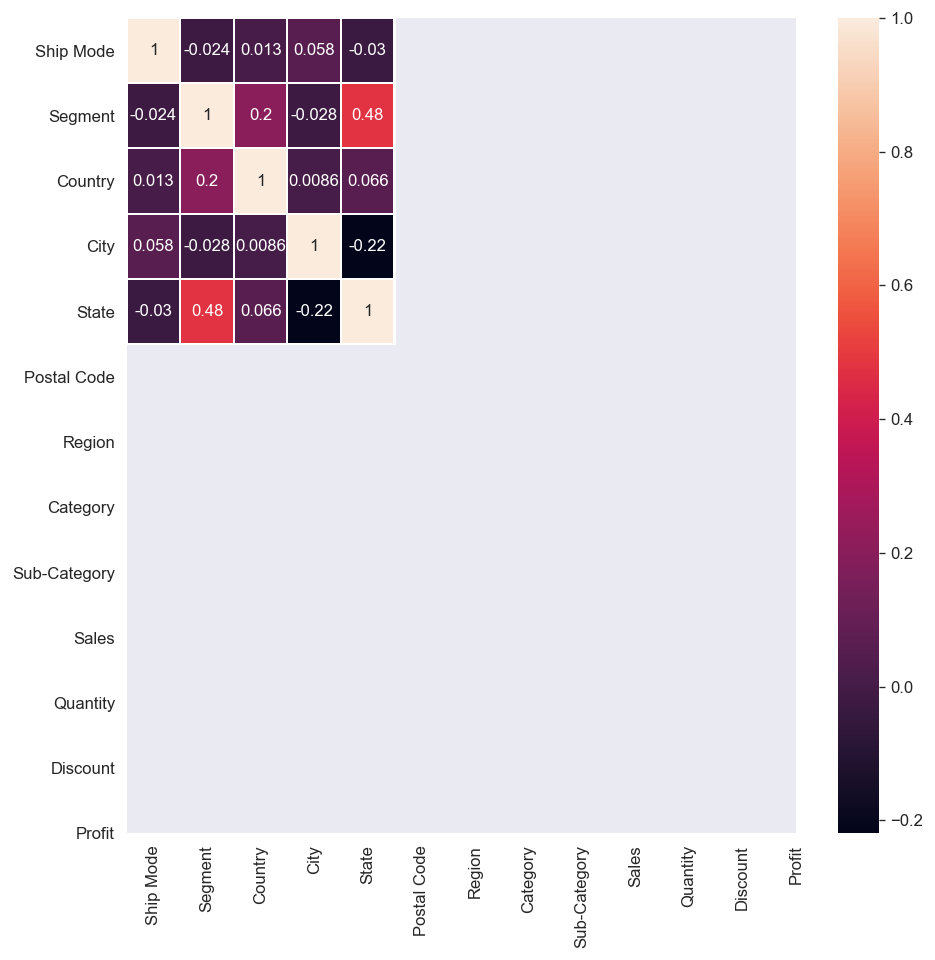

In [108]:
corel=raw_data.corr()
plt.figure(figsize=(9,9),dpi=120)
sns.heatmap(corel,xticklabels=raw_data.columns,yticklabels=raw_data.columns,annot=True,linewidth=.7)

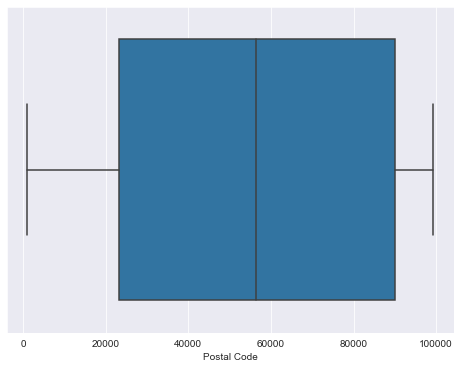

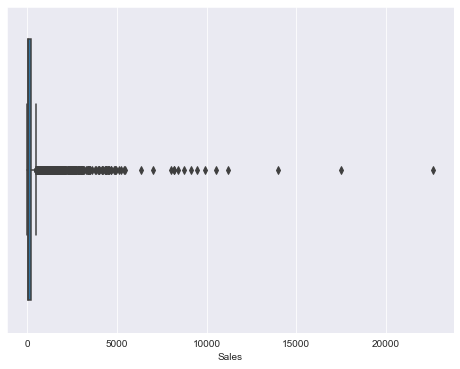

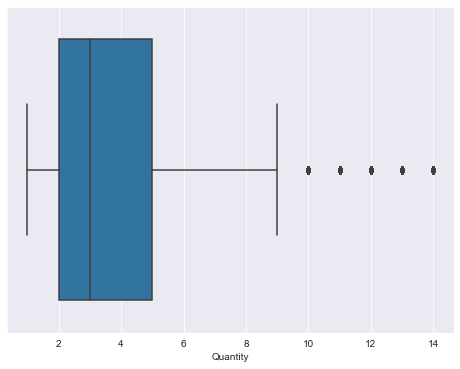

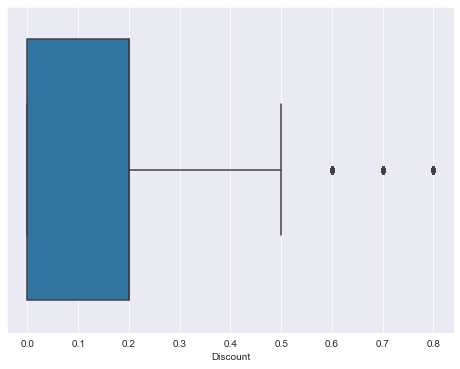

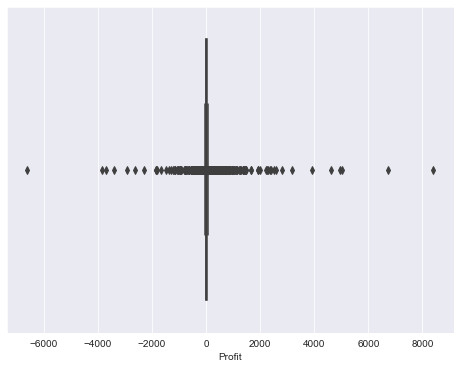

In [109]:
for i in columns:
    fig = plt.figure(figsize = (8,6))
    sns.boxplot(x=raw_data[i])


* Sales are not high in general
* Quantity above 8 are considered to be outliers
* Discount over 0.5 are considered outliers as well

##### We have done a comprehensive Exploration of the data provided!